In [1]:
import numpy as np
import pandas as pd
import glob
import string

from sklearn.model_selection import train_test_split
from nltk.tag import pos_tag

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing Dataset

We import the CSV files

In [2]:
all_data = pd.DataFrame()
for f in glob.glob("./data/*.csv"):
    df = pd.read_csv(f)
    all_data = all_data.append(df,ignore_index=True)

In [3]:
all_data.info()
all_data = all_data.sample(frac=1).reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 20 columns):
id                       2232 non-null float64
id_str                   2232 non-null object
screen_name              2232 non-null object
location                 1420 non-null object
description              1911 non-null object
url                      1212 non-null object
followers_count          2232 non-null int64
friends_count            2232 non-null int64
listedcount              2232 non-null int64
created_at               2232 non-null object
favourites_count         2232 non-null int64
verified                 2232 non-null bool
statuses_count           2232 non-null int64
lang                     2232 non-null object
status                   2203 non-null object
default_profile          2232 non-null bool
default_profile_image    2232 non-null bool
has_extended_profile     2154 non-null object
name                     2232 non-null object
bot                      2232

In [4]:
all_data.head(4)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,2.295282e+09,2295281700,ClickerMaker,NaN,Once a day I generate a random [Whatever] Clic...,NaN,185,1,14,Fri Jan 17 01:37:04 +0000 2014,0,False,573,en,"{u'contributors': None, u'truncated': False, u...",True,False,False,Clicker Maker,1
1,1.908076e+07,19080760,AFI,NaN,Pre-order The Blood Album on iTunes. https://t...,https://t.co/pPGkMEWViU,112499,9471,2038,Fri Jan 16 19:20:26 +0000 2009,1,True,625,en,"{u'contributors': None, u'truncated': True, u'...",False,False,False,AFI,0
2,4.848983e+09,4848983413,debbyr83,"Linn Creek city, MO, USA","The Mole Hole of Myrtle Beach,SC has been in b...",NaN,2,334,0,2/2/16,19,False,27,en,Status(text='Free Domain Forever: http://www.B...,True,False,False,Debby Garcia,1
3,3.810743e+09,3810742695,crazyl1f,NaN,NaN,NaN,2,5,0,Tue Sep 29 04:13:42 +0000 2015,0,False,2,zh-cn,"{'truncated': False, 'entities': {'user_mentio...",True,True,False,Songgaoyun Deng,0


In [47]:
train, test = train_test_split(all_data, test_size = 0.2)

In [6]:
train.shape , test.shape

((1785, 20), (447, 20))

# Visualizing Data

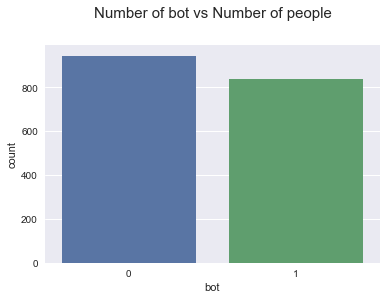

In [7]:
plt.title('Number of bot vs Number of people', y=1.1, size=15)
sns.countplot('bot', data=train)

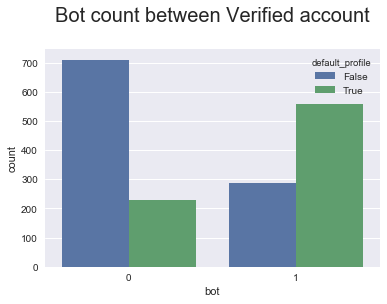

In [8]:
plt.title('Bot count between Verified account', size=20, y=1.1)
sns.countplot(x = 'bot', hue='default_profile', data=train)

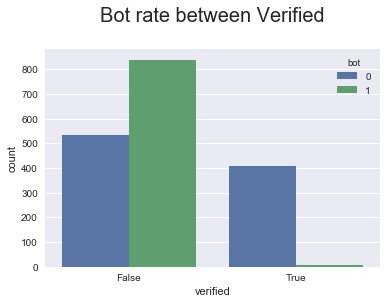

In [10]:
plt.title('Bot rate between Verified', size=20, y=1.1)
sns.countplot(x='verified', hue='bot', data=train)

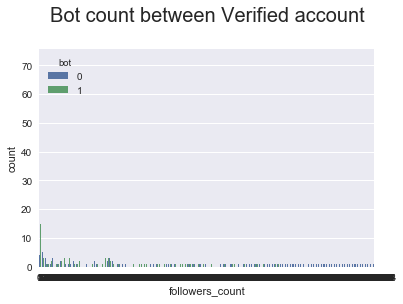

In [11]:
plt.title('Bot count between Verified account', size=20, y=1.1)
sns.countplot(x = 'followers_count', hue='bot', data=train)

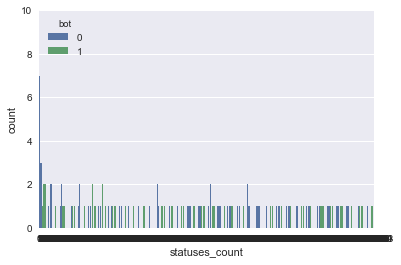

In [38]:
plt.xlim(0, 10)
plt.ylim(0, 10)
sns.countplot(x = 'statuses_count', hue='bot', data=train)

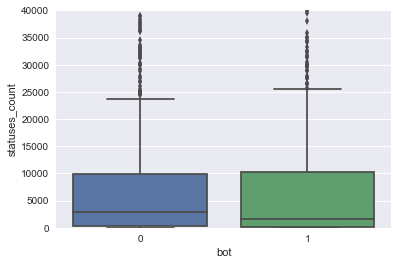

In [32]:
plt.ylim(0, 40000)
sns.boxplot(x='bot', y='statuses_count', data=train)

count    1.785000e+03
mean     9.689370e+05
std      5.355878e+06
min      0.000000e+00
25%      4.500000e+01
50%      3.430000e+02
75%      1.307100e+04
max      9.632156e+07
Name: followers_count, dtype: float64

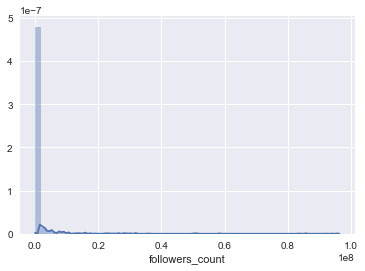

In [11]:
sns.distplot(train['followers_count'])
train['followers_count'].describe()

In [76]:
def lexical_diversity(text):
  if len(text) == 0:
    diversity = 0
  else: 
    diversity = float(len(set(text))) / len(text)
  return diversity

def screenname_format(text):
  if text[-2:].isdigit():
    return True
  else: 
    return False

def screenname_length(text):
    return len(str(text))

def screenname_digitcount(text):
    c = 0
    for x in text:
        if x.isdigit():
            c+=1
    return c

In [120]:
train.loc[:,'last_numeric'] = train.screen_name.apply(screenname_format)
train.loc[:,'sn_length'] = train.screen_name.apply(screenname_length)
train.loc[:,'sn_digitcount'] = train.screen_name.apply(screenname_digitcount)


In [124]:
test.loc[:,'last_numeric'] = test.screen_name.apply(screenname_format)
test.loc[:,'sn_length'] = test.screen_name.apply(screenname_length)
test.loc[:,'sn_digitcount'] = test.screen_name.apply(screenname_digitcount)

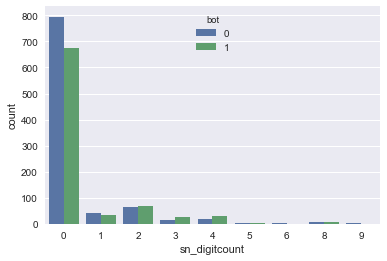

In [72]:
sns.countplot(x ='sn_digitcount', hue='bot' ,data=train)

In [122]:
train.loc[:,'description'].fillna("")
train.loc[:,'desc_length'] = train.description.apply(screenname_length)

In [125]:
test.loc[:,'description'].fillna("")
test.loc[:,'desc_length'] = test.description.apply(screenname_length)

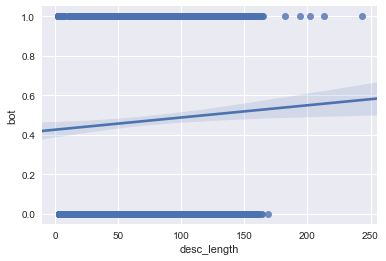

In [81]:
ax = sns.regplot(x=train['desc_length'], y=train['bot'])

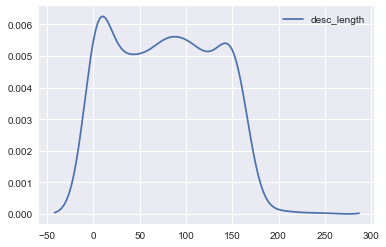

In [87]:
df1 = train[['desc_length','bot']]
bot_len  = df1.ix[(df1['bot']==1)]
sns.kdeplot(bot_len['desc_length'])

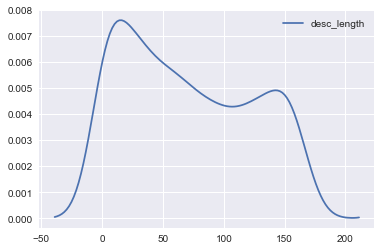

In [93]:
df1 = train[['desc_length','bot']]
nbot_len  = df1.ix[(df1['bot']==0)]
sns.kdeplot(nbot_len['desc_length'])

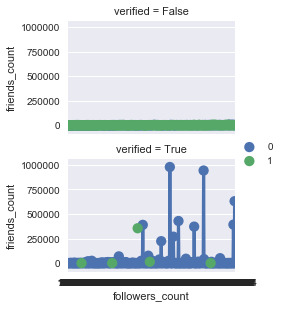

In [94]:
grid = sns.FacetGrid(train, row='verified', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'followers_count', 'friends_count', 'bot', palette='deep')
grid.add_legend()

In [127]:
grouped = train['screen_name']
train['diversity'] = grouped.apply(lexical_diversity)

In [126]:
grouped = test['screen_name']
test['diversity'] = grouped.apply(lexical_diversity)

In [13]:
df1 = train[['diversity','bot']]
bot_diversity  = df1.ix[(df1['bot']==1)]
Nonbot_diversity = df1.ix[(df1['bot']==0)]
bot_diversity.shape, Nonbot_diversity.shape

/Users/Vignesh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


((845, 2), (940, 2))

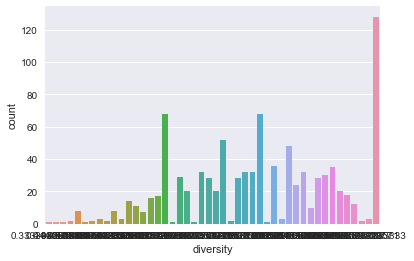

In [14]:
sns.countplot(x = Nonbot_diversity['diversity'], data=Nonbot_diversity)

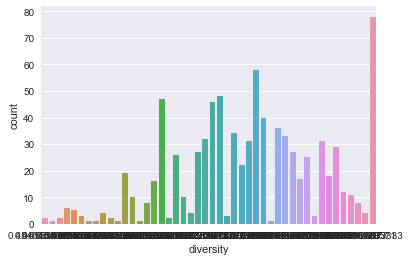

In [15]:
sns.countplot(x = bot_diversity['diversity'], data=bot_diversity)

# Transforming Features

Since we must deal with numerical feature, we should convert all the following in a binary vector 0/1.
1. verified 
2. default_profile 
3. default_profile_image 
4. has_extended_profile 

In [7]:
train['followers_count'].describe()

count    1.785000e+03
mean     9.015671e+05
std      4.773001e+06
min      0.000000e+00
25%      4.400000e+01
50%      3.470000e+02
75%      1.304900e+04
max      8.568108e+07
Name: followers_count, dtype: float64

In [8]:
def returnDates(x):
    formated_date = ''
    months = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
    if x.startswith('"') and x.endswith('"'): x = x[1:-1]
    date_split = x.split(' ')
    if len(date_split) == 1:
        _date = date_split[0].split('/')
        _date[2] = '20'+_date[2]
        formated_date = ''.join(map(str,_date))
        #print formated_date , date_split, pd.to_datetime(formated_date, format='%m%d%Y', errors='coerce')
    elif len(date_split) == 2:
        _date = date_split[0].split('/')
        formated_date = ''.join(map(str,[_date[1],_date[0],_date[2]]))
        #print formated_date , date_split, pd.to_datetime(formated_date, format='%m%d%Y', errors='coerce')
    elif len(date_split) == 6:
        m = months[date_split[1]]
        formated_date = ''.join(map(str,[m,date_split[2],date_split[5]]))
        if formated_date[-1] == '"': formated_date = formated_date[:-1]
        #print formated_date, date_split, pd.to_datetime(formated_date, format='%m%d%Y', errors='coerce')
    
    return pd.to_datetime(formated_date, format='%m%d%Y', errors='coerce')

In [98]:
train, test = train_test_split(all_data, test_size = 0.2)
train.loc[:,'followers_count'] = pd.qcut(train['followers_count'], 4)
train[['followers_count', 'bot']].groupby(['followers_count'], as_index=False).mean().sort_values(by='followers_count', ascending=True)

,followers_count,bot
0,"[0, 44]",0.740492
1,"(44, 348]",0.565022
2,"(348, 13725]",0.511211
3,"(13725, 96321564]",0.087444


In [119]:
import sys
train, test = train_test_split(all_data, test_size = 0.2)
def ff_ratio(df):
    df.followers_count = df.followers_count.apply(lambda x: int(x)+1)
    df.friends_count = df.friends_count.apply(lambda x: int(x)+1)
    df.loc[:,'ff_ratio'] = (df.followers_count/df.friends_count)
    return df
    
def simplfy_followerscount(df):
    bins = (0, 46,358,14917,96321560,sys.maxint)
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile', '5_quartile']
    categories = pd.cut(df.followers_count, bins, labels=group_names)
    df.followers_count = categories
    return df  

def simplfy_friendscount(df):
    bins = (0, 10,197,671,978964,sys.maxint)
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile', '5_quartile']
    categories = pd.cut(df['friends_count'], bins, labels=group_names)
    df.friends_count = categories
    return df    

def simplfy_listedcount(df):
    df.loc[:,'listedcount']= df.listedcount.apply(lambda x: int(x)+1)
    bins = (0, 2,18,360,222411,sys.maxint)
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile', '5_quartile']
    categories = pd.cut(df['listedcount'], bins, labels=group_names)
    df.loc[:,'listedcount'] = categories
    return df    

def simplfy_favouritescount(df):
    df.loc[:,'favourites_count']= df.favourites_count.apply(lambda x: int(x)+1)
    bins = (0,2,25,484,714021,sys.maxint)
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile', '5_quartile']
    categories = pd.cut(df.favourites_count, bins, labels=group_names)
    df.loc[:,'favourites_count']= categories
    return df  

def simplfy_statusescount(df):
    df.loc[:,'statuses_count']= df.statuses_count.apply(lambda x: int(x)+1)
    bins = (0,178,2290,10025,6863363,sys.maxint)
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile', '5_quartile']
    categories = pd.cut(df.statuses_count, bins, labels=group_names)
    df.loc[:,'statuses_count']= categories
    return df 

def drop_features(df):
    return df.drop(['id', 'id_str', 'location','lang','status','name','url','created_at'], axis=1)

def replace_None(df):
    df.loc[:,'has_extended_profile'] = df['has_extended_profile'].fillna(df.has_extended_profile.median())
    return df

def format_date(df):
    df.loc[:,'modified_date'] = df.created_at.apply(returnDates)
    return df;


def transform_features(df):
    df = ff_ratio(df)
    df = simplfy_followerscount(df)
    df = simplfy_friendscount(df)
    df = simplfy_listedcount(df)
    df = simplfy_favouritescount(df)
    df = simplfy_statusescount(df)   
    df = replace_None(df)  
    df = format_date(df)
    df = drop_features(df)
    return df

train = transform_features(train)
test = transform_features(test)
train.head()

,screen_name,description,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot,ff_ratio,modified_date
814,jeslyncat,"""Too much television watching got me chasing d...",2_quartile,3_quartile,3_quartile,4_quartile,False,3_quartile,False,False,False,0,1.552632,2009-06-23
758,imtheMDP,"Financial Analyst by day, Sports Analyst by Ni...",3_quartile,4_quartile,2_quartile,4_quartile,False,4_quartile,False,False,False,0,0.276446,2009-03-06
693,Nathan60899955,NaN,1_quartile,2_quartile,1_quartile,1_quartile,False,1_quartile,True,True,0,1,0.081081,2017-10-02
167,LanceUlanoff,Chief Correspondent and Editor-at-Large of Mas...,4_quartile,4_quartile,4_quartile,4_quartile,True,4_quartile,False,False,True,0,11.261225,2007-03-19
1350,lettergamebot,Let's play letter games!,1_quartile,1_quartile,2_quartile,1_quartile,False,3_quartile,True,False,False,1,6.000000,2016-03-11


In [128]:
np.where(pd.isnull(train.statuses_count))

(array([], dtype=int64),)

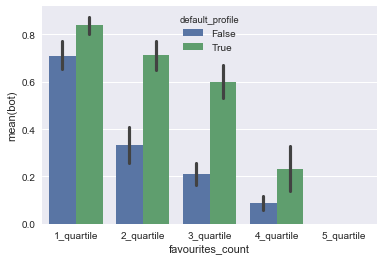

In [21]:
sns.barplot(x="favourites_count", y="bot", hue="default_profile", data=train);

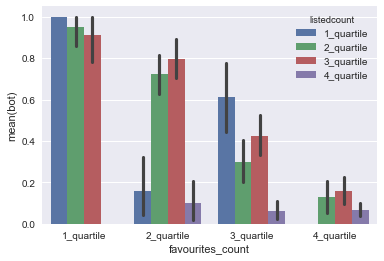

In [46]:
sns.barplot(x="favourites_count", y="bot", hue="listedcount", data=train);

# Final Encoding

The LabelEncoder in Scikit-learn will convert each unique string value into a number, making out data more flexible for various algorithms.

In [129]:
train.head()

,screen_name,description,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot,ff_ratio,modified_date,last_numeric,sn_length,sn_digitcount,desc_length,diversity
814,jeslyncat,"""Too much television watching got me chasing d...",2_quartile,3_quartile,3_quartile,4_quartile,False,3_quartile,False,False,False,0,1.552632,2009-06-23,False,9,0,87,1.000000
758,imtheMDP,"Financial Analyst by day, Sports Analyst by Ni...",3_quartile,4_quartile,2_quartile,4_quartile,False,4_quartile,False,False,False,0,0.276446,2009-03-06,False,8,0,119,1.000000
693,Nathan60899955,NaN,1_quartile,2_quartile,1_quartile,1_quartile,False,1_quartile,True,True,0,1,0.081081,2017-10-02,True,14,8,3,0.714286
167,LanceUlanoff,Chief Correspondent and Editor-at-Large of Mas...,4_quartile,4_quartile,4_quartile,4_quartile,True,4_quartile,False,False,True,0,11.261225,2007-03-19,False,12,0,128,0.750000
1350,lettergamebot,Let's play letter games!,1_quartile,1_quartile,2_quartile,1_quartile,False,3_quartile,True,False,False,1,6.000000,2016-03-11,False,13,0,24,0.692308


In [130]:
train.diversity.describe()

count    1785.000000
mean        0.800908
std         0.117187
min         0.214286
25%         0.727273
50%         0.800000
75%         0.888889
max         1.000000
Name: diversity, dtype: float64

In [131]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['followers_count','friends_count','listedcount','favourites_count','verified','statuses_count', \
                'default_profile','default_profile_image','has_extended_profile','ff_ratio','sn_length','desc_length','diversity']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train.loc[:,feature] = le.transform(df_train[feature])
        df_test.loc[:,feature] = le.transform(df_test[feature])
    return df_train, df_test
    
train, test = encode_features(train, test)
train.head()

,screen_name,description,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot,ff_ratio,modified_date,last_numeric,sn_length,sn_digitcount,desc_length,diversity
814,jeslyncat,"""Too much television watching got me chasing d...",1,2,2,3,0,2,0,0,0,0,848,2009-06-23,False,7,0,85,51
758,imtheMDP,"Financial Analyst by day, Sports Analyst by Ni...",2,3,1,3,0,3,0,0,0,0,404,2009-03-06,False,6,0,117,51
693,Nathan60899955,NaN,0,1,0,0,0,0,1,1,0,1,223,2017-10-02,True,12,8,1,26
167,LanceUlanoff,Chief Correspondent and Editor-at-Large of Mas...,3,3,3,3,1,3,0,0,1,0,1068,2007-03-19,False,10,0,126,29
1350,lettergamebot,Let's play letter games!,0,0,1,0,0,2,1,0,0,1,1008,2016-03-11,False,11,0,22,23


In [21]:
train_output = pd.DataFrame(data=train, columns =list(train))
test_output = pd.DataFrame(data=test, columns =list(test))

# Use pandas to write the comma-separated output file
train_output.to_csv("./cleanedData/Bot_Training.csv", index=False)
test_output.to_csv("./cleanedData/Bot_Testing.csv", index=False)

# Splitting up the Training Data


First, separate the features(X) from the labels(y).
* X_all: All features minus the value we want to predict (Bot).
* y_all: Only the value we want to predict.

Second, use Scikit-learn to randomly shuffle this data into four variables. In this case, Training 80% of the data, then testing against the other 20%.

Later, this data will be reorganized into a KFold pattern to validate the effectiveness of a trained algorithm

In [132]:
from sklearn.model_selection import train_test_split

X_all = train.drop(['bot','modified_date','screen_name','description','last_numeric','sn_digitcount'], axis=1)
y_all = train['bot']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [133]:
X_train.shape, y_train.shape

((1428, 13), (1428,))

In [134]:
X_test.shape, y_test.shape

((357, 13), (357,))

In [135]:
list(X_train)

['followers_count',
 'friends_count',
 'listedcount',
 'favourites_count',
 'verified',
 'statuses_count',
 'default_profile',
 'default_profile_image',
 'has_extended_profile',
 'ff_ratio',
 'sn_length',
 'desc_length',
 'diversity']

# Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [137]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.873949579832


In [138]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.844444444444
Fold 2 accuracy: 0.85393258427
Fold 3 accuracy: 0.887640449438
Fold 4 accuracy: 0.876404494382
Fold 5 accuracy: 0.921348314607
Fold 6 accuracy: 0.831460674157
Fold 7 accuracy: 0.808988764045
Fold 8 accuracy: 0.887640449438
Fold 9 accuracy: 0.910112359551
Fold 10 accuracy: 0.842696629213
Mean Accuracy: 0.866466916355


In [139]:
clf.feature_importances_

array([ 0.06034288,  0.16431486,  0.06515202,  0.17551868,  0.09633578,
        0.03653969,  0.11120847,  0.00294853,  0.00811913,  0.15645848,
        0.03698468,  0.05133979,  0.034737  ])

In [140]:
list(X_train)

['followers_count',
 'friends_count',
 'listedcount',
 'favourites_count',
 'verified',
 'statuses_count',
 'default_profile',
 'default_profile_image',
 'has_extended_profile',
 'ff_ratio',
 'sn_length',
 'desc_length',
 'diversity']

In [142]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

83.12

In [143]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

79.27

In [145]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print acc_decision_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)run_kfold(decision_tree)

99.93
Fold 1 accuracy: 0.811111111111
Fold 2 accuracy: 0.797752808989
Fold 3 accuracy: 0.85393258427
Fold 4 accuracy: 0.876404494382
Fold 5 accuracy: 0.876404494382
Fold 6 accuracy: 0.820224719101
Fold 7 accuracy: 0.808988764045
Fold 8 accuracy: 0.808988764045
Fold 9 accuracy: 0.820224719101
Fold 10 accuracy: 0.752808988764
Mean Accuracy: 0.822684144819


In [161]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


Ada_clf = AdaBoostClassifier()

parameters = {'n_estimators': [100, 50, 80], 
              'learning_rate': [1.0,0.5],
              'base_estimator': [DecisionTreeClassifier(),clf]
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(Ada_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Ada_clf = grid_obj.best_estimator_

Ada_clf.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [162]:
predictions = Ada_clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.873949579832


In [163]:
run_kfold(Ada_clf)

Fold 1 accuracy: 0.833333333333
Fold 2 accuracy: 0.85393258427
Fold 3 accuracy: 0.898876404494
Fold 4 accuracy: 0.876404494382
Fold 5 accuracy: 0.898876404494
Fold 6 accuracy: 0.85393258427
Fold 7 accuracy: 0.820224719101
Fold 8 accuracy: 0.921348314607
Fold 9 accuracy: 0.921348314607
Fold 10 accuracy: 0.808988764045
Mean Accuracy: 0.86872659176


In [67]:
def get_Noun(x):
    word = x.strip()
    count = 0
    tagged_sent = pos_tag(word.split())
    for w in tagged_sent:
        if w[1] == 'NNP':
            count+=1
        if w[1] == 'VBZ':
            count-=1
    return count

In [68]:
df['name'] = df['name'].fillna("")
train['NounCount'] = df['name'].apply(get_Noun)

In [69]:
train['NounCount'].describe()

count    939.000000
mean       1.436635
std        0.932120
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: NounCount, dtype: float64

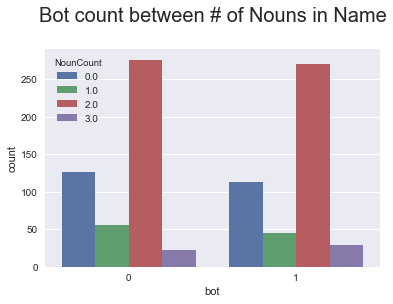

In [70]:
plt.title('Bot count between # of Nouns in Name', size=20, y=1.1)
sns.countplot(x = 'bot', hue='NounCount', data=train)

In [71]:
train['created_at'][0]

Timestamp('2010-07-13 00:00:00')

In [21]:
from datetime import date
import calendar
print type(train['created_at'])
train['days'] = train['created_at'].apply(lambda x: calendar.day_name[x.weekday()])

KeyError: 'created_at'

In [74]:
train['days'].describe()

count         1785
unique           7
top       Thursday
freq           291
Name: days, dtype: object

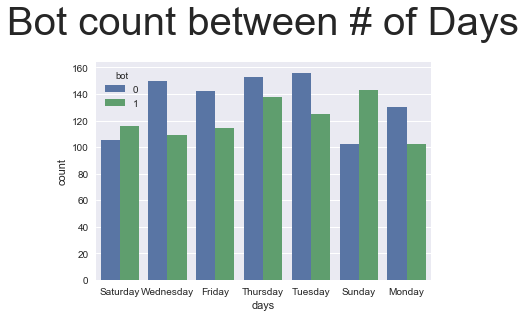

In [77]:
plt.title('Bot count between # of Days', size=40, y=1.1)
sns.countplot(x = 'days', hue='bot', data=train)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
2084,5.817313e+07,58173133,Maheshbhupathi,"��T: 19.057273,72.825963","An Outlier,Twice over!",https://t.co/hOkJ2t0a4I,947045,271,2618,7/19/09,88,True,4905,en,"Status(contributors=None, truncated=False, tex...",False,False,False,Mahesh Bhupathi,0
1798,1.453254e+07,14532539,tonyromo,"Dallas, TX",Official twitter account of Dallas Cowboys QB ...,NaN,351335,19,1221,4/25/08,395,True,25,en,"Status(contributors=None, truncated=False, tex...",False,False,False,Tony Romo,0
354,2.205977e+09,2205976656,magicpixx,NaN,Follow me for algorithmically-curated pictures...,NaN,10250,10378,194,Thu Nov 21 01:14:23 +0000 2013,211,False,262067,en,"{u'contributors': None, u'truncated': False, u...",True,False,False,Magic Pics,1


(1785, 20)
(1785, 9)
(1785,)


/Users/Vignesh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Vignesh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile
57,1047,299,28,958,False,3098,False,False,False
1361,35,134,7,17,False,989,False,False,False
1141,4,28,0,0,False,2,True,False,True


In [20]:
cross_val_score(clf, train, bot, cv=2)

ValueError: could not convert string to float: False

In [28]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf,out_file='tree.dot') 